<a href="https://colab.research.google.com/github/Mithila101/email_spam_detecton/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [11]:
target_col = ["target"]
input_cols =df.drop("target", axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df.target.value_counts()

,count
target,
1,526
0,499


<Axes: xlabel='target'>

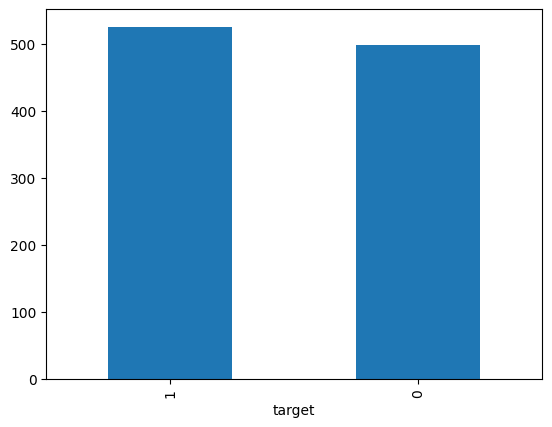

In [14]:
df["target"].value_counts().plot(kind="bar")

<Axes: xlabel='sex'>

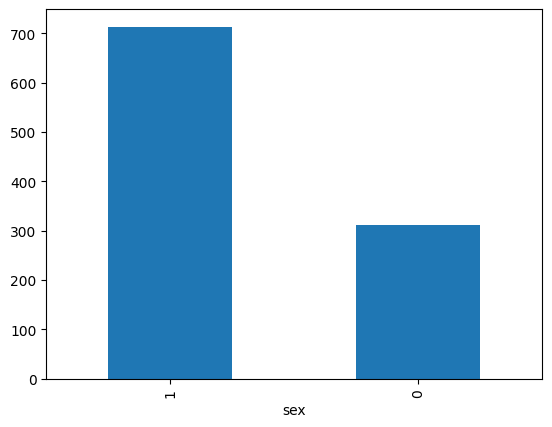

In [16]:
df["sex"].value_counts().plot(kind="bar")

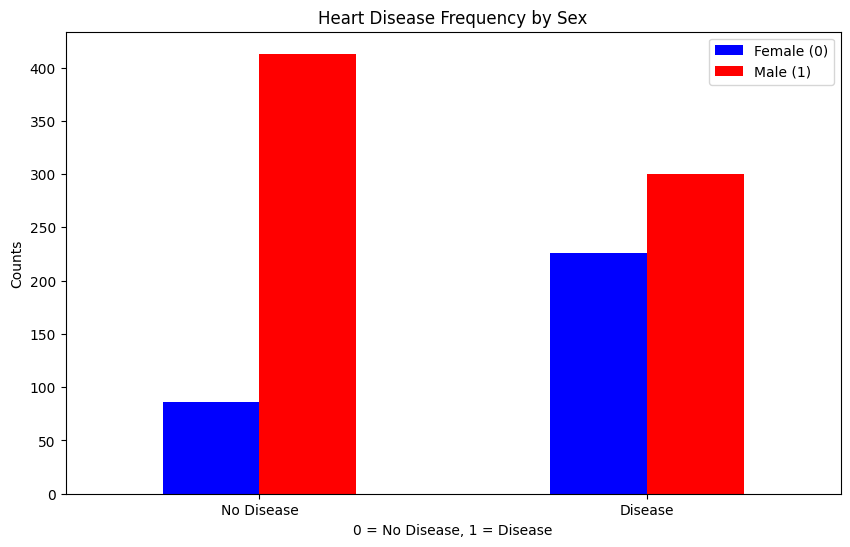

In [17]:
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    figsize=(10, 6),
    color=["blue", "red"]
)
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female (0)", "Male (1)"])
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

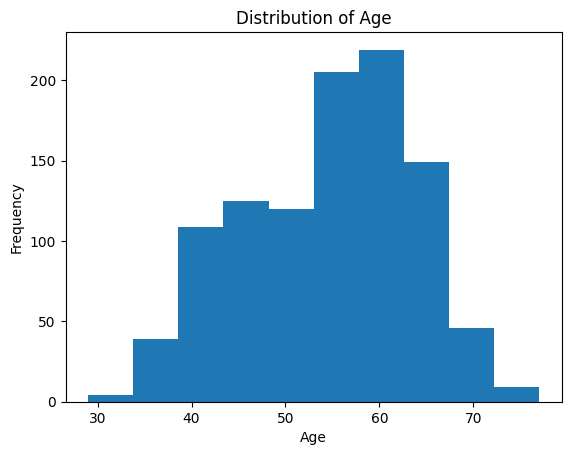

In [19]:
df.age.plot.hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [21]:
target_col = df["target"]
input_cols = df.drop("target", axis=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
input_cols = scaler.fit_transform(input_cols)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_cols, target_col, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
Y_pred = model1.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print(classification_report(y_test,Y_pred))

Accuracy: 81.46%
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       102
           1       0.77      0.90      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [26]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
Y_pred = model2.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print(classification_report(y_test,Y_pred))

Accuracy: 93.17%
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       102
           1       0.97      0.89      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [27]:
model4 = DecisionTreeClassifier(max_features=2, max_depth=10, criterion='gini', random_state=42)
model4.fit(X_train,y_train)
Y_pred = model4.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print(classification_report(y_test,Y_pred))

Accuracy: 91.71%
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.91      0.93      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [28]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
Y_pred = model5.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print(classification_report(y_test, Y_pred))

Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [29]:
model6 = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=5, bootstrap=True, random_state=42, n_jobs=-1)
model6.fit(X_train, y_train)
Y_pred = model6.predict(X_test)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print(classification_report(y_test, Y_pred))

Random Forest Accuracy: 98.54%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

